# Introduction to Convolutional Neural Networks - HW

In this project, you will be learning how to train a deep neural network using a machine learning framework. 

Please do not wait until the last minute to do this assignment! While I have constructed it so that the programming part will not take so long, actually training the networks can take some time, depending on the machine you run on. It takes my implementation about five minutes to train all the networks (without any hyperparameter optimization).


#### Data
* **MNIST** - we've used it before and its back.  Let's see how we can build our CNN to gain accuracy.

For each, we will keep the following fixed:
* **epochs**     = 10
* **batch_size** = 200
* **optimizer**  
<code>
opt = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,    name='Adam')
</code>

#### Report/perform the following for each Exercise
1. Print the model architecture (both summary and plot) in your report.
2. Fit the model above with the training dataset, with 10 epochs, minibatch size of 200. 
3. One figure that displays the validation loss versus the epoch number for each of the above. 
4. The time used by the algorithm for training.



## Summary of exercises

#### Exercise 1a: LeNet-5 background
#### Exercise 1b: LeNet-5 build
#### Exercise 1c: LeNet-5 improve
    i) improve with dropout
    ii) improve with activation function
    iii) improve with smaller convolutional filter
#### Exercise 1d: Discuss





#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
plt.rcParams["figure.figsize"] = [9.708,6]
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
#this is our new one
import tensorflow as tf
tf.random.set_seed(0)
np.random.seed(0)
# !pip install tensorflow
from tensorflow.keras.datasets import mnist
#we will use this a lot, so lets make a function
def printAccuracy(history,results_test):
    print("train loss %.5f \t train acc: %.5f"%(history.history['loss'][-1],history.history['accuracy'][-1]))
    print("valid loss %.5f \t valid acc: %.5f"%(history.history['val_loss'][-1],history.history['val_accuracy'][-1]))
    print("test loss  %.5f \t test acc:  %.5f"%(results_test[0],results_test[1]))
#we will do this a lot, so lets make a function for this
def plot_result(history,results_test):
    # Get training and validation histories
    training_acc = history.history['accuracy']
    val_acc      = history.history['val_accuracy']
    # Create count of the number of epochs
    epoch_count = range(1, len(training_acc) + 1)
    # Visualize loss history
    plt.plot(epoch_count, training_acc, 'b-o',label='Training')
    plt.plot(epoch_count, val_acc, 'r--',label='Validation')
    plt.plot(epoch_count, results_test[1]*np.ones(len(epoch_count)),'k--',label='Test')
    plt.legend()
    plt.title("Training and validation accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_classes = 10
input_shape = (X_train.shape[1],X_train.shape[2])
#normalize the data between 0-1
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype( 'float32') / 255
#Reshape To Match The tf.keras's Expectations for CNNs
X_train = X_train.reshape(X_train.shape[0], input_shape[0], input_shape[1],1)
X_test  = X_test.reshape( X_test.shape[0],  input_shape[0], input_shape[1],1)
#one hot encoding
Y_train = tf.keras.utils.to_categorical(y_train, num_classes)
Y_test  = tf.keras.utils.to_categorical(y_test,  num_classes)
#==============
print(X_train.shape[0], 'train samples')
print(X_test.shape[0],  'test samples')
print(X_train.shape)
print(X_train[0].shape)

60000 train samples
10000 test samples
(60000, 28, 28, 1)
(28, 28, 1)


### Reduce size of data
* Note we are doing this because we are interested in how architecture affects the accuracy. 
* To speed up training and test for your hw, we are decreasing the size of the training data by factor of 4.  
* You'll certainly get better results using the whole dataset, but we dont want to spend all our time **training** the **best** model, we'd rather learn how to use CNNs.

In [3]:
mm= 4
X_train=X_train[::mm]
Y_train=Y_train[::mm]
print(X_train.shape)

(15000, 28, 28, 1)


## Exercise 1a: LeNet-5 background

One of the first successful neural networks for MNIST was LeNet-5. By doing a literature search, answer the following questions, and present your findings in your report.


**a.** What is architecture of LeNet-5? That is, what layers does it have, how large are they, how are they connected, and what activation function is used? Complete the following table.
    
| Layer | # Input Units | # Output Units | # Parameters | 
| :- | :- | :- | :- | 
| Conv2D layer 1 | 28x28x1 | | | 
| Pool 1 |  | | | 
| Conv2D layer 2 | | | | 
| Pool 2 |  | | | 
| Flatten |  | | | 
| Fully connected layer 1 | | | | 
| Fully connected layer 2 | | | | 
| Output layer |  | 10 | None | 

#### Note:
* For **conv2D** use: $$number_{parameters} = out_{channels} \times (in_{channels} \times kernel_h \times kernel_w + 1)  $$
* Pooling layers do not have fit parameters.

    
**b.** What accuracy should one expect to get when implementing LeNet-5 on MNIST? That is, what accuacy was achieved?



# your answers here

Source: https://towardsdatascience.com/understanding-and-implementing-lenet-5-cnn-architecture-deep-learning-a2d531ebc342, https://en.wikipedia.org/wiki/LeNet, and https://www.analyticssteps.com/blogs/lenet-5-tutorial-architecture-features-and-importance


| Layer | # Input Units | # Output Units | # Parameters | 
| :- | :- | :- | :- | 
| Conv2D layer 1 | 28x28x1 | 28x28x6 | 156 = 6*(1*5*5+1) | 
| Pool 1 | 28x28x6 | 14x14x6 | 0 | 
| Conv2D layer 2 | 14x14x6 | 10x10x16 | 2416 = 16*(6*5*5+1) | 
| Pool 2 | 10x10x16 | 5x5x16 | 0 | 
| Flatten | 5x5x16 | 400x1 | 0 | 
| Fully connected layer 1 | 400x1 | 120x1 | 48120 = (120*400) + 120 | 
| Fully connected layer 2 | 120x1 | 84x1 | 10164 = (84*120) + 84 | 
| Output layer | 84x1 | 10x1 | None | 

Compute parameters: https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d

## Exercise 1b: LeNet-5 build
#### Training a network. 

In TensorFlow, implement a feedforward neural network with the following layers:

* **conv1**: Convolution layer with 6 filters, with kernel size 5 x 5, tanh as the activation function, with stride 1 and padding='same'.
* **Pool1**: A avg-pooling layer with pool size 2x2, stride=2, and padding='valid'.
* **conv2**: Convolution layer with 16 filters, with kernel size 5 x 5, tanh as the activation function, with stride 1 and padding='valid'.
* **Pool2**: A avg-pooling layer with pool size 2x2, stride=2, and padding='valid'.
* **Flatten**
* **FC1**: Fully connected layer with 120 neurons, and tanh as the activation function.
* **FC2**: Fully connected layer with 84 neurons, and tanh as the activation function.
* **Output**: Output layer containing 10 neurons, softmax as activation function



In [4]:
# set our initial seed
tf.random.set_seed(0)

In [5]:
#build model here
lenet_5_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=X_train[0].shape, padding='same'), #C1
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'), #S2
    tf.keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'), #S4
    # tf.keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5 Why there exists layer Conv2D called C5 (according to some sources)?
    tf.keras.layers.Flatten(), #Flatten
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax') #Output layer
])

In [6]:
epochs     = 10
batch_size = 100
opt = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
lenet_5_model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#train model here
tstart   = tf.timestamp()
history_LeNet5 = lenet_5_model.fit(X_train, Y_train, verbose=1,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split = 0.2) 
total_time = tf.timestamp() - tstart
print("total time %3.3f seconds"%total_time)

Epoch 1/10
120/120 [==============================] - 4s 25ms/step - loss: 0.5663 - accuracy: 0.8288 - val_loss: 0.3155 - val_accuracy: 0.9047
Epoch 2/10
120/120 [==============================] - 3s 24ms/step - loss: 0.2652 - accuracy: 0.9154 - val_loss: 0.2346 - val_accuracy: 0.9247
Epoch 3/10
120/120 [==============================] - 3s 23ms/step - loss: 0.1814 - accuracy: 0.9433 - val_loss: 0.1979 - val_accuracy: 0.9387
Epoch 4/10
120/120 [==============================] - 3s 24ms/step - loss: 0.1388 - accuracy: 0.9595 - val_loss: 0.1577 - val_accuracy: 0.9540
Epoch 5/10
120/120 [==============================] - 3s 24ms/step - loss: 0.1077 - accuracy: 0.9679 - val_loss: 0.1569 - val_accuracy: 0.9530
Epoch 6/10
120/120 [==============================] - 3s 23ms/step - loss: 0.0840 - accuracy: 0.9761 - val_loss: 0.1329 - val_accuracy: 0.9617
Epoch 7/10
120/120 [==============================] - 3s 26ms/step - loss: 0.0652 - accuracy: 0.9802 - val_loss: 0.1308 - val_accuracy: 0.9613

In [7]:
#===    Accuracy and loss
results_test = lenet_5_model.evaluate(X_test, Y_test, batch_size=128,verbose=0)    
printAccuracy(history_LeNet5,results_test)

train loss 0.02888 	 train acc: 0.99183
valid loss 0.12154 	 valid acc: 0.96333
test loss  0.10815 	 test acc:  0.96670


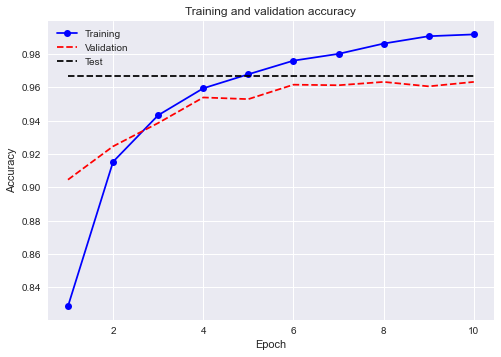

In [8]:
#===    Plot Accuracy
plot_result(history_LeNet5,results_test)

### comments
The training accuracy is much higher than validation accuracy, so the model is overtraining

## Exercise 1c:i) : LeNet-5 improve: activation functions to relu
#### Training a network. 

LeNet-5 is a bit dated, and doesn't actually represent modern deep learning practices. We will actually successively improve LeNet-5 to reflect more modern approaches to CNN.

#### Change activation functions for Conv layers and FC to RELU.
#### Change average pooling to max pooling

* **conv1**: Convolution layer with 6 filters, with kernel size 5 x 5, relu as the activation function, with stride 1 and padding='same'.
* **Pool1**: A max-pooling layer with pool size 2x2, stride=2, and padding='valid'.
* **conv2**: Convolution layer with 16 filters, with kernel size 5 x 5, relu as the activation function, with stride 1 and padding='valid'.
* **Pool2**: A max-pooling layer with pool size 2x2, stride=2, and padding='valid'.
* **Flatten**
* **FC1**: Fully connected layer with 120 neurons, and relu as the activation function.
* **FC2**: Fully connected layer with 84 neurons, and relu as the activation function.
* **Output**: Output layer containing 10 neurons, softmax as activation function



In [9]:
tf.random.set_seed(0)                             # set our initial seed
#build model here
#build model here
lenet_5_model_relu = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=X_train[0].shape, padding='same'), #C1
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'), #S2
    tf.keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'), #C3
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'), #S4
    tf.keras.layers.Flatten(), #Flatten
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') #Output layer
])

In [10]:
epochs     = 10
batch_size = 100
opt = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,    name='Adam')
#train model here
lenet_5_model_relu.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#train model here
tstart   = tf.timestamp()
history_LeNet5_relu = lenet_5_model_relu.fit(X_train, Y_train, verbose=1,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split = 0.2) 
total_time = tf.timestamp() - tstart
print("total time %3.3f seconds"%total_time)

Epoch 1/10
120/120 [==============================] - 3s 26ms/step - loss: 0.6694 - accuracy: 0.7929 - val_loss: 0.2466 - val_accuracy: 0.9257
Epoch 2/10
120/120 [==============================] - 3s 26ms/step - loss: 0.1933 - accuracy: 0.9406 - val_loss: 0.1431 - val_accuracy: 0.9567
Epoch 3/10
120/120 [==============================] - 3s 26ms/step - loss: 0.1235 - accuracy: 0.9628 - val_loss: 0.1257 - val_accuracy: 0.9630
Epoch 4/10
120/120 [==============================] - 3s 26ms/step - loss: 0.0954 - accuracy: 0.9707 - val_loss: 0.1002 - val_accuracy: 0.9693
Epoch 5/10
120/120 [==============================] - 3s 26ms/step - loss: 0.0831 - accuracy: 0.9747 - val_loss: 0.0858 - val_accuracy: 0.9730
Epoch 6/10
120/120 [==============================] - 3s 27ms/step - loss: 0.0607 - accuracy: 0.9816 - val_loss: 0.0988 - val_accuracy: 0.9727
Epoch 7/10
120/120 [==============================] - 3s 26ms/step - loss: 0.0481 - accuracy: 0.9847 - val_loss: 0.0789 - val_accuracy: 0.9780

In [11]:
#===    Accuracy and loss
results_test_relu = lenet_5_model_relu.evaluate(X_test, Y_test, batch_size=128,verbose=0)    
printAccuracy(history_LeNet5_relu,results_test_relu)

train loss 0.02816 	 train acc: 0.99008
valid loss 0.09109 	 valid acc: 0.97700
test loss  0.06351 	 test acc:  0.98020


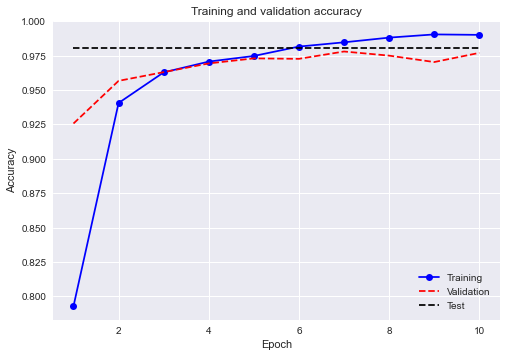

In [12]:
#===    Plot Accuracy
plot_result(history_LeNet5_relu,results_test_relu)

### your comments
In general, the accuracy is still high as using tanh, but the training accuracy in closer to validation accuracy

## Exercise 1c:ii) : LeNet-5 improved: add dropout

#### Add dropout (rate of 0.4) after the convolutional block.
#### Add dropout (rate of 0.4) after the first and second fully connected layer


* **conv1**: Convolution layer with 6 filters, with kernel size 5 x 5, relu as the activation function, with stride 1 and padding='same'.
* **Pool1**: A max-pooling layer with pool size 2x2, stride=2, and padding='valid'.
* **conv2**: Convolution layer with 16 filters, with kernel size 5 x 5, relu as the activation function, with stride 1 and padding='valid'.
* **Pool2**: A max-pooling layer with pool size 2x2, stride=2, and padding='valid'.
* **Flatten**
* **Dropout**: rate of 0.4
* **FC1**: Fully connected layer with 120 neurons, and relu as the activation function.
* **Dropout**: rate of 0.4
* **FC2**: Fully connected layer with 84 neurons, and relu as the activation function.
* **Dropout**: rate of 0.4
* **Output**: Output layer containing 10 neurons, softmax as activation function



In [13]:
tf.random.set_seed(0)                             # set our initial seed
#build model here
lenet_5_model_drop = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=X_train[0].shape, padding='same'), #C1
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'), #S2
    tf.keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'), #C3
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'), #S4
    tf.keras.layers.Flatten(), #Flatten
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='softmax') #Output layer
])

In [14]:
epochs     = 10
batch_size = 100
opt = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,    name='Adam')
#train model here
lenet_5_model_drop.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#train model here
tstart   = tf.timestamp()
history_LeNet5_drop = lenet_5_model_drop.fit(X_train, Y_train, verbose=1,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split = 0.2) 
total_time = tf.timestamp() - tstart
print("total time %3.3f seconds"%total_time)

Epoch 1/10
120/120 [==============================] - 4s 29ms/step - loss: 1.1826 - accuracy: 0.5957 - val_loss: 0.2671 - val_accuracy: 0.9247
Epoch 2/10
120/120 [==============================] - 3s 28ms/step - loss: 0.4173 - accuracy: 0.8738 - val_loss: 0.1528 - val_accuracy: 0.9560
Epoch 3/10
120/120 [==============================] - 3s 28ms/step - loss: 0.2976 - accuracy: 0.9127 - val_loss: 0.1242 - val_accuracy: 0.9670
Epoch 4/10
120/120 [==============================] - 3s 28ms/step - loss: 0.2357 - accuracy: 0.9282 - val_loss: 0.1021 - val_accuracy: 0.9700
Epoch 5/10
120/120 [==============================] - 3s 27ms/step - loss: 0.2189 - accuracy: 0.9373 - val_loss: 0.1065 - val_accuracy: 0.9693
Epoch 6/10
120/120 [==============================] - 3s 27ms/step - loss: 0.1921 - accuracy: 0.9438 - val_loss: 0.0890 - val_accuracy: 0.9720
Epoch 7/10
120/120 [==============================] - 3s 28ms/step - loss: 0.1741 - accuracy: 0.9480 - val_loss: 0.0858 - val_accuracy: 0.9747

In [15]:
#===    Accuracy and loss
results_test_drop = lenet_5_model_drop.evaluate(X_test, Y_test, batch_size=128,verbose=0)    
printAccuracy(history_LeNet5_drop,results_test_drop)

train loss 0.13803 	 train acc: 0.95842
valid loss 0.07906 	 valid acc: 0.97933
test loss  0.05325 	 test acc:  0.98580


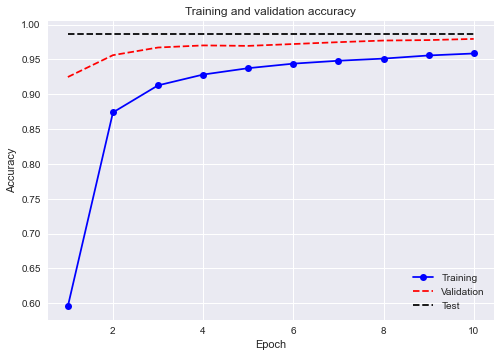

In [16]:
#===    Plot Accuracy
plot_result(history_LeNet5_drop,results_test_drop)

### your comments here
It seems that the training time for this model is longer than the others two. The test and accuracy in this case is higher than training accuracy, which indicates that the model has not learnt enough

## Exercise 1c:iii) : LeNet-5 modern: smaller convolutions
Lets build a more modern network with fewer parameters.  Now its more customary to use (3x3) filters instead of (5x5).

### Use smaller convolution filters. Size (3x3), stride = 1.
### Remove second fully connected layer


* **conv1**: Convolution layer with 8 filters, with kernel size 3 x 3, relu as the activation function, with stride 1 and padding='same'.
* **Pool1**: A max-pooling layer with pool size 2x2, stride=2, and padding='valid'.
* **conv2**: Convolution layer with 16 filters, with kernel size 3 x 3, relu as the activation function, with stride 1 and padding='valid'.
* **Pool2**: A max-pooling layer with pool size 2x2, stride=2, and padding='valid'.
* **Dropout**: rate of 0.4
* **Flatten**
* **FC1**: Fully connected layer with 100 neurons, and relu as the activation function.
* **Dropout**: rate of 0.4
* **Output**: Output layer containing 10 neurons, softmax as activation function



In [17]:
tf.random.set_seed(0)                             # set our initial seed
#build model here
lenet_5_model_drop_small = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, kernel_size=3, strides=1,  activation='relu', input_shape=X_train[0].shape, padding='same'), #C1
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'), #S2
    tf.keras.layers.Conv2D(16, kernel_size=3, strides=1, activation='relu', padding='valid'), #C3
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'), #S4
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), #Flatten
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='softmax') #Output layer
])

In [18]:
epochs     = 10
batch_size = 100
opt = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,    name='Adam')
#train model here
lenet_5_model_drop_small.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#train model here
tstart   = tf.timestamp()
history_LeNet5_drop_small = lenet_5_model_drop_small.fit(X_train, Y_train, verbose=1,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split = 0.2) 
total_time = tf.timestamp() - tstart
print("total time %3.3f seconds"%total_time)

Epoch 1/10
120/120 [==============================] - 3s 24ms/step - loss: 0.9349 - accuracy: 0.6978 - val_loss: 0.2498 - val_accuracy: 0.9273
Epoch 2/10
120/120 [==============================] - 3s 22ms/step - loss: 0.3430 - accuracy: 0.8938 - val_loss: 0.1738 - val_accuracy: 0.9460
Epoch 3/10
120/120 [==============================] - 3s 23ms/step - loss: 0.2663 - accuracy: 0.9152 - val_loss: 0.1459 - val_accuracy: 0.9570
Epoch 4/10
120/120 [==============================] - 3s 23ms/step - loss: 0.2252 - accuracy: 0.9292 - val_loss: 0.1155 - val_accuracy: 0.9660
Epoch 5/10
120/120 [==============================] - 3s 22ms/step - loss: 0.2030 - accuracy: 0.9360 - val_loss: 0.1084 - val_accuracy: 0.9670
Epoch 6/10
120/120 [==============================] - 3s 22ms/step - loss: 0.1768 - accuracy: 0.9434 - val_loss: 0.0942 - val_accuracy: 0.9730
Epoch 7/10
120/120 [==============================] - 3s 23ms/step - loss: 0.1609 - accuracy: 0.9482 - val_loss: 0.0875 - val_accuracy: 0.9723

In [19]:
#===    Accuracy and loss
results_test_drop_small = lenet_5_model_drop_small.evaluate(X_test, Y_test, batch_size=128,verbose=0)    
printAccuracy(history_LeNet5_drop_small,results_test_drop_small)

train loss 0.12627 	 train acc: 0.95900
valid loss 0.07752 	 valid acc: 0.97867
test loss  0.05491 	 test acc:  0.98290


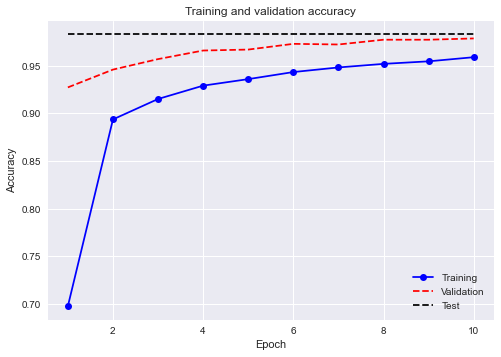

In [20]:
#===    Plot Accuracy
plot_result(history_LeNet5_drop_small,results_test_drop_small)

### your comments here
Similar to the model with drop layers, but the training accuracy in the 1st epoch of this model is much higher than the drop-layer model. I believe because with small kernel size, we keep more values than with bigger size, so the training accuracy is higher

## Exercise 1d - summarize your results

Compile your results in the table below. Report accuracy to 3 decimal places (0.XXX).

Comment on your findings.  

    i. Fill in the following table to summarize your results.

| exercise | train accuracy | test accuracy | time (s) |
| - | - | - | - |
| Ex 1b - LeNet5 | 0.99183 | 0.96670 | 29.890 | 
| Ex 1c:i - ReLU, MaxPool  | 0.99008 | 0.98020 | 32.210 |
| Ex 1c:ii - Dropout | 0.95842 | 0.98580 | 33.661 |
| Ex 1c:iii - Modern Small | 0.95900 | 0.98290 | 27.549 |


    ii. Use your understanding and how the model improved through Exercises 1c to explain how these modifications contribute.


#### your answer here


# Exercise 2

**a)** Take one final swing at Fashion MNIST. Last class, we pushed Fashion-MNIST test accuracy to 89%.  Can you push above **90%** in just 5 epochs? 
* Only train up to epochs=5
* Anything else goes. You can try changing layers, number of filters, etc.

#### Not recommended unless you want to explore on your own.
* The following are NOT recommended as they depend too heavily on computational resources.
* Data augmentation (reflecting/rotating the images).  Its not necessary, but something to try
* Transfer learning as resizing inputs is costly both memory and processing.  Let's focus on a model you build yourself.


In [21]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, X_test = X_train_full[:-10000], X_train_full[-10000:]
y_train, y_test = y_train_full[:-10000], y_train_full[-10000:]
#standard scale
X_mean  = X_train.mean(axis=0, keepdims=True)
X_std   = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_test  = (X_test - X_mean) / X_std
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
#one-hot encoding
num_classes= 10
Y_train = tf.keras.utils.to_categorical(y_train, num_classes)
Y_test  = tf.keras.utils.to_categorical(y_test,  num_classes) 

print(X_train.shape)
print(X_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)


In [26]:
# build model here
my_lenet5_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, kernel_size=2, strides=1,  activation='relu', input_shape=X_train[0].shape, padding='same'), #C1
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'), #S2
    tf.keras.layers.Conv2D(16, kernel_size=2, strides=1, activation='relu', padding='valid'), #C3
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'), #S4
    # tf.keras.layers.Conv2D(32, kernel_size=2, strides=1, activation='relu', padding='valid'), #C5
    tf.keras.layers.Flatten(), #Flatten
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax') #Output layer
])

In [29]:
#train model here
epochs=5
batch_size= 30
#
opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True, name='Adam')
#train model here
my_lenet5_model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#train model here
tstart   = tf.timestamp()
my_history_LeNet5 = my_lenet5_model.fit(X_train, Y_train, verbose=1,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split = 0.2) 
total_time = tf.timestamp() - tstart
print("total time %3.3f seconds"%total_time)

Epoch 1/5
1334/1334 [==============================] - 15s 11ms/step - loss: 0.2327 - accuracy: 0.9128 - val_loss: 0.2684 - val_accuracy: 0.9066
Epoch 2/5
1334/1334 [==============================] - 15s 12ms/step - loss: 0.2207 - accuracy: 0.9169 - val_loss: 0.2653 - val_accuracy: 0.9040
Epoch 3/5
1334/1334 [==============================] - 16s 12ms/step - loss: 0.2126 - accuracy: 0.9205 - val_loss: 0.2705 - val_accuracy: 0.9052
Epoch 4/5
1334/1334 [==============================] - 15s 12ms/step - loss: 0.2073 - accuracy: 0.9220 - val_loss: 0.2777 - val_accuracy: 0.9037
Epoch 5/5
1334/1334 [==============================] - 16s 12ms/step - loss: 0.1996 - accuracy: 0.9240 - val_loss: 0.2768 - val_accuracy: 0.9031
total time 77.896 seconds


In [30]:
#===    Accuracy and loss
my_results_test = my_lenet5_model.evaluate(X_test, Y_test, batch_size=128,verbose=0)    
printAccuracy(my_history_LeNet5, my_results_test)

train loss 0.19959 	 train acc: 0.92397
valid loss 0.27682 	 valid acc: 0.90310
test loss  0.26595 	 test acc:  0.90780


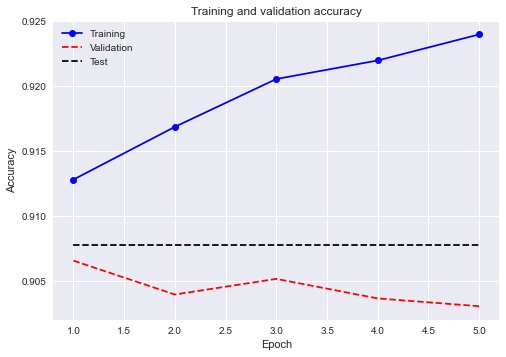

In [32]:
#===    Plot Accuracy
plot_result(my_history_LeNet5, my_results_test)

### Comment
It seems that the model is overtraining

# Exercise 3

Suppose we have a 4 × 4 input that looks like this:

$$
A = \begin{pmatrix}
1 & 2 & 1 & -1 \\
0 & 0 & 1 & -1 \\
1 & 0 & 1 & -1 \\
1 & 1 & 0 & 0 
\end{pmatrix}
$$

$$
k = \begin{pmatrix}
-1 & 0 & -1  \\
0 & 1 & 1  \\
1 & 0 & -1
\end{pmatrix}
$$

#### a) Apply the 3 × 3 convolutional kernel $k$  to the input A (above). 
* Use a stride of 1 when convolving.
* Use a zero-padding of 1. 
* Do not apply the ReLU activation or any pooling. 
* Show your work (e.g. the multiplications and additions).


#### b) Apply max pooling to the input (the 4x4 matrix above, not your result from part a).  
* Use a kernel size of 2 and a stride of 2. Show your computation for one of the output units



## your answer here

#### a) 

$$
APadded = \begin{pmatrix}
0 & 0 & 0 & 0 &  0 & 0 \\
0 & 1 & 2 & 1 & -1 & 0 \\
0 & 0 & 0 & 1 & -1 & 0 \\
0 & 1 & 0 & 1 & -1 & 0 \\
0 & 1 & 1 & 0 &  0 & 0 \\
0 & 0 & 0 & 0 &  0 & 0 \\
\end{pmatrix}
$$
My work is attached as image.
$$
result = \begin{pmatrix}
3 & 2 & 2 & 0 \\
-2 & -1 & 0 & -1 \\
0 & 1 & 2 & -2 \\
2 & -1 & 1 & -1
\end{pmatrix}
$$

#### b)

$$
result = \begin{pmatrix}
2 & 1 \\
1 & 1
\end{pmatrix}
$$






# Exercise 4: Questions


    a. Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?
    b. What are the main innovations for AlexNet and ResNet?
    c. If your computer (or GPU) runs out of memory while training a CNN, what are three things you could do to try to solve the problem?

# your answers here

a. Because max pooling helps because it extracts the sharpest features of an image and reduces variance, computation complexity

b. 
* AlexNet:
  * Uses ReLU instead of the tanh function
  * Has 5 convolutional layers, 3 pooling layers, 2 fully-connected layers, and a softmax classifier output layer
  * Has Normalization layers
  * Has output of 1 of 1000 classes
  * Is computationally expensive, but made feasible due to the utilization of GPUs during training
* ResNet:
  * Has the residual module. A residual module is specifically an identity residual module, which is a block of two convolutional layers with the same number of filters and small filter size. The output of the second layer is added with the input to the first convolution layer
  * Can reduce effect of gradient vanishing, so it can have so many layers

c. Reduce the mini-batch size. Reduce dimensionality using a larger stride in one or more layers. Remove one or more layers